# We rate Dogs Data Wrangling Project

# Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. Here I am documented wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries).



# 1. Gathering Data

Here I begin the process of wrangling by gathering the required data. The only data that I didn't have to obtain elsewhere are the data contained in the file "twitter-archive-enhanced.csv" which was provided to me.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
import re
import datetime as dt

In [2]:
# Read in csv file as pandas dataframe and quick check to view structure
tweet_arch = pd.read_csv('twitter-archive-enhanced.csv')
tweet_arch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# Use requests library to programmatically download the tsv file
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Read in tsv file in pandas dataframe and quick check to view structure
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [5]:
tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
# Authentication Details: load personal API keys (replaced with placeholders)
consumer_key = 'MY CONSUMER KEY'
consumer_secret = "MY CONSUMER SECRET KEY"
access_token = 'MY ACCESS TOKEN'
access_secret = 'MY ACCESS SECRET'
# variables for Twitter API connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [8]:
# write the querying JSON data into tweet_json.txt
with open('tweet_json.txt','a',encoding = 'utf8') as f:
    for tweet_id in tweet_arch['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended') # set mode to extended
            json.dump(tweet._json, f)
            f.write('\n')
        except: 
            continue

In [9]:
# Create a empty list for insert each tweet info into it
tweets = []

tweet_json = open('tweet_json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)
    
tweet_json.close()

In [10]:
tweet_data = pd.DataFrame()  # create a empty dataframe for map the tweet_data info 

tweet_data['id'] = list(map(lambda tweet: tweet['id'], tweets))

tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))

tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

In [11]:
tweet_data.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# 2. Assessing

# twiter archive

In [12]:

tweet_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
#checking for number of informations available in tweet_arch
tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [150]:
tweet_arch.drop(tweet_arch[tweet_arch['retweeted_status_user_id'].notnull()].index,axis=0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
tweet_arch[tweet_arch['rating_numerator'] == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [15]:
len(tweet_arch[tweet_arch['rating_numerator'] == 0 ])

2

In [16]:
# total missing values for each features
tweet_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
# Checking for name which have name starting with small letters.
tweet_arch['name'].str.islower().value_counts()

False    2247
True      109
Name: name, dtype: int64

In [18]:
# 10 is the standard rating_denominator, other numbers could be errors
tweet_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
# some extreme values such as 420, 1776 could be errors
tweet_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
# Make sure all id's are unique, no duplicates
tweet_arch[tweet_arch.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# Images

In [21]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
# How many first predictions are actually dogs
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [24]:
# How many second predictions dogs
(image_predictions.p2_dog == True).sum()

1553

In [25]:
# How many third predictions are not dogs
(image_predictions.p3_dog == False).sum()

576

In [26]:
# Number of rows wher all p1, p2, p3 are false.
len(image_predictions[(image_predictions['p1_dog']==False) & (image_predictions['p2_dog']==False) & (image_predictions['p3_dog']==False)])

324

In [27]:
# Check for tweet duplicates in image_predictions
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [28]:
len(image_predictions[image_predictions.jpg_url.duplicated()])

66

# tweet_data

In [29]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [30]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [31]:
tweet_data['retweet_count'].max()

79515

In [32]:
tweet_data['favorite_count'].max()

132810

In [79]:
# Make sure all id's are unique - no duplicates
print(sum(tweet_data.groupby('id')['id'].nunique())) # sum of unique values
print(sum(tweet_data.id.duplicated())) # Sum of duplicates

2354
0


# Observations:-

Quality
1. Removing some of columns which are part of retweet in tweet_arch.
2. tweet_arch, convert timestamp to datetime object.
3. tweet_arch, make all values in ratings_denominator '10' for consistency (or remove)
4. tweet_arch, make all None value NaN(missing value)
5. tweet_arch, check rating_numerator outliers - 
6. tweet_arch, some names are sometimes first letter capital but sometimes not. Keep the name format consistent.
7. tweet_arch, tweet_id datatype is an integer, convert to string (object)
8. image_predictions, Remove non-dogs, the 324 rows where p1, p2, and p3 are false


Tidiness Issues
1. Columns 'doggo', 'floofer', 'pupper', 'puppo' in tweet_arch should belong to one colomn -- stage
2. Join tweet_arch, image_predictions & tweet_data into one main dataset main_data_set based on the common column(id).

I'll create copies of the dataframes to use for cleaning and keep the originals intact for future reference.
1. arch_clean (original df: tweet_arch)
2. image_clean (original df: image_predictions)
3. data_clean (original df: tweet_data)

In [80]:
# Create copies of original dataframes
arch_clean = tweet_arch.copy()
image_clean = image_predictions.copy()
data_clean = tweet_data.copy()

# Clean
I have already created copies of the dataframes to use for cleaning and keep the originals intact for future reference.
1. arch_clean (original df: tweet_arch)
2. image_clean (original df: image_predictions)
3. data_clean (original df: tweet_data)

Finally, I'll join all 3 datasets into one main: main_data_set.

Step one in cleaning is to address missing data. Next I'll address quality issues and finally tidness issues.

Define:
Removing the unncessary columns realted to retweets.

Code

In [81]:
arch_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id'], axis=1,inplace=True)

Test

In [82]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


Define: Converting the timestamp column to datetime, using to_datetime method()

Code

In [83]:
arch_clean['timestamp']=pd.to_datetime(arch_clean['timestamp'])


Test

In [84]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


Define: Droping all rows which have not ratings_denominator value '10' for consistency, using drop method()

Code

In [85]:
arch_clean.drop(arch_clean[arch_clean['rating_denominator'] != 10].index, inplace = True) 

Test

In [86]:
arch_clean[arch_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Define: Replacing the value 'None' with the NaN (missing value) using replace method()


Code

In [87]:
arch_clean =  arch_clean.replace('None', np.nan)

Test

In [88]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2333 non-null int64
timestamp             2333 non-null datetime64[ns]
source                2333 non-null object
text                  2333 non-null object
expanded_urls         2278 non-null object
rating_numerator      2333 non-null int64
rating_denominator    2333 non-null int64
name                  1605 non-null object
doggo                 97 non-null object
floofer               10 non-null object
pupper                257 non-null object
puppo                 30 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 236.9+ KB


Define: droping rating_numerator outliers, which are above 20 using drop method()

Code

In [89]:
arch_clean.drop(arch_clean[arch_clean['rating_numerator'] >20].index, inplace = True) 

Test

In [90]:
arch_clean[arch_clean['rating_numerator'] > 20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Define: Converting tweet_id to string using astype() method.

Code

In [91]:
arch_clean['tweet_id']=arch_clean['tweet_id'].astype(str)

Test

In [92]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2324 non-null object
timestamp             2324 non-null datetime64[ns]
source                2324 non-null object
text                  2324 non-null object
expanded_urls         2272 non-null object
rating_numerator      2324 non-null int64
rating_denominator    2324 non-null int64
name                  1601 non-null object
doggo                 97 non-null object
floofer               10 non-null object
pupper                256 non-null object
puppo                 30 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 236.0+ KB


Define: Making all the first letter of name in capital form using str.title() method. And renaming the incorrect names.

Code

In [93]:
arch_clean['name'].value_counts()

a           54
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Buddy        7
Toby         7
Daisy        7
Bailey       7
Milo         6
Dave         6
Jax          6
Jack         6
Bella        6
an           6
Scout        6
Koda         6
Stanley      6
Leo          6
Rusty        6
Oscar        6
Larry        5
Phil         5
            ..
Robin        1
Timmy        1
Gustav       1
Erik         1
Rinna        1
Wishes       1
Charl        1
Oddie        1
Fletcher     1
Toffee       1
Birf         1
Trigger      1
Jessiga      1
Bobbay       1
Kallie       1
Snoop        1
Aja          1
Storkson     1
Adele        1
Stuart       1
Hall         1
Stella       1
Stu          1
Kota         1
Rontu        1
Arlen        1
Ben          1
Furzey       1
Lance        1
Mike         1
Name: name, Length: 952, dtype: int64

In [94]:
arch_clean['name'].str.islower().value_counts()


False    1495
True      106
Name: name, dtype: int64

In [95]:
mask = arch_clean['name'].str.islower().fillna(False)
arch_clean[mask]['name'].value_counts()

a               54
the              8
an               6
very             5
just             4
quite            4
one              4
actually         2
not              2
mad              2
getting          2
incredibly       1
officially       1
life             1
by               1
all              1
old              1
such             1
my               1
his              1
infuriating      1
light            1
unacceptable     1
space            1
Name: name, dtype: int64

In [96]:
# worked over names, to drop all irrelevent names.

In [97]:
for i in arch_clean[mask]['name']:
        arch_clean['name'].replace(i, np.nan, inplace=True)

Test

In [98]:
arch_clean['name'].str.islower().value_counts()

False    1495
Name: name, dtype: int64

In [99]:
arch_clean.name.value_counts()

Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Winston      9
Bo           9
Sadie        8
Toby         7
Daisy        7
Buddy        7
Bailey       7
Jax          6
Leo          6
Rusty        6
Koda         6
Scout        6
Oscar        6
Bella        6
Jack         6
Milo         6
Stanley      6
Dave         6
Sunny        5
Phil         5
Finn         5
Louis        5
Alfie        5
            ..
Tassy        1
Kial         1
Cheryl       1
Robin        1
Timmy        1
Gustav       1
Godzilla     1
Charl        1
Stuart       1
Lance        1
Toffee       1
Birf         1
Trigger      1
Jessiga      1
Bobbay       1
Kallie       1
Snoop        1
Aja          1
Storkson     1
Fletcher     1
Adele        1
Hall         1
Stella       1
Stu          1
Kota         1
Rontu        1
Arlen        1
Ben          1
Furzey       1
Mike         1
Name: name, Length: 928, dtype: int64

In [100]:
arch_clean[mask]['name'].value_counts()

Series([], Name: name, dtype: int64)

Test

In [101]:
arch_clean['name'].str.islower().value_counts()

False    1495
Name: name, dtype: int64

Define: Checking for the source

Code

In [102]:
arch_clean['source'].value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2190
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [103]:
# simpfy the source contexts
       
arch_clean['source'] = arch_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iphone')
arch_clean['source'] =  arch_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
arch_clean['source'] =  arch_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
arch_clean['source'] =  arch_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')


Test

In [104]:
arch_clean['source'].value_counts()

Twitter for iphone     2190
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

Define: Removing the 324 rows where p1, p2, and p3 are false in image_predictions dataframe

Code

In [105]:
len(image_clean[(image_clean['p1_dog']==False) & (image_clean['p2_dog']==False) & (image_clean['p3_dog']==False)])

324

In [106]:
image_clean.drop(image_clean[(image_clean['p1_dog']==False) & (image_clean['p2_dog']==False) & (image_clean['p3_dog']==False)].index,inplace=True)

Test

In [107]:
len(image_clean[(image_clean['p1_dog']==False) & (image_clean['p2_dog']==False) & (image_clean['p3_dog']==False)])

0

# Tidness Issue


Define: Define the single column name stage to put the columns( 'doggo', 'floofer', 'pupper', 'puppo') value into it. And deleting the thier tables name after that.

Code

In [108]:
arch_clean.loc[arch_clean['doggo'] == 'doggo', 'stage'] = 'doggo'
arch_clean.loc[arch_clean['floofer'] == 'floofer', 'stage'] = 'floofer'
arch_clean.loc[arch_clean['pupper'] == 'pupper', 'stage'] = 'pupper'
arch_clean.loc[arch_clean['puppo'] == 'puppo', 'stage'] = 'puppo'

In [109]:
arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN


In [110]:
# droping columns name 'doggo', 'floofer', 'pupper', 'puppo'
arch_clean = arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

Test

In [111]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2324 non-null object
timestamp             2324 non-null datetime64[ns]
source                2324 non-null object
text                  2324 non-null object
expanded_urls         2272 non-null object
rating_numerator      2324 non-null int64
rating_denominator    2324 non-null int64
name                  1495 non-null object
stage                 379 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 181.6+ KB


Define: Join tweet_arch, image_predictions & tweet_data into one main dataset main_data_set based on the common column(id).

Code

In [112]:
# rename the 'id' from `tweet_data` in preparing for table join
data_clean.rename(columns={'id': 'tweet_id'}, inplace = True)

In [113]:
data_clean['tweet_id']=data_clean['tweet_id'].astype(str)

In [114]:
image_clean['tweet_id']=image_clean['tweet_id'].astype(str)

In [115]:
# join two tables on 'tweet_id' and use inner join method
arch_clean = pd.merge(arch_clean, data_clean, on='tweet_id', how = 'inner')

Test

In [116]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2322 entries, 0 to 2321
Data columns (total 11 columns):
tweet_id              2322 non-null object
timestamp             2322 non-null datetime64[ns]
source                2322 non-null object
text                  2322 non-null object
expanded_urls         2270 non-null object
rating_numerator      2322 non-null int64
rating_denominator    2322 non-null int64
name                  1494 non-null object
stage                 378 non-null object
retweet_count         2322 non-null int64
favorite_count        2322 non-null int64
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 217.7+ KB


In [117]:
arch_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819


In [118]:
# merging image_clean table with arch_clean into main_data_set

main_data_set = pd.merge(arch_clean, image_clean, on='tweet_id', how = 'inner')

Test

In [119]:
main_data_set.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [120]:
main_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 0 to 1729
Data columns (total 22 columns):
tweet_id              1730 non-null object
timestamp             1730 non-null datetime64[ns]
source                1730 non-null object
text                  1730 non-null object
expanded_urls         1730 non-null object
rating_numerator      1730 non-null int64
rating_denominator    1730 non-null int64
name                  1225 non-null object
stage                 269 non-null object
retweet_count         1730 non-null int64
favorite_count        1730 non-null int64
jpg_url               1730 non-null object
img_num               1730 non-null int64
p1                    1730 non-null object
p1_conf               1730 non-null float64
p1_dog                1730 non-null bool
p2                    1730 non-null object
p2_conf               1730 non-null float64
p2_dog                1730 non-null bool
p3                    1730 non-null object
p3_conf               1730 non-nu

In [121]:
main_data_set.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

#  Analysation & Visualization

In [122]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')

In [123]:
twitter_archive_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


# Distribution of Dog Stages:-

Text(0.5,1,'The Distribution of Dog Stages')

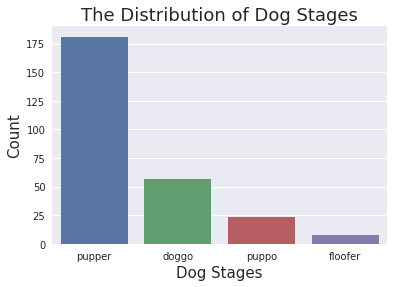

In [124]:
sorted_stage = twitter_archive_master['stage'].value_counts().index
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_master, x = 'stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Dog Stages', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('The Distribution of Dog Stages',fontsize=18)

# Distribution of Source

Twitter for iphone     2188
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64


Text(0.5,1,'The Distribution of Source')

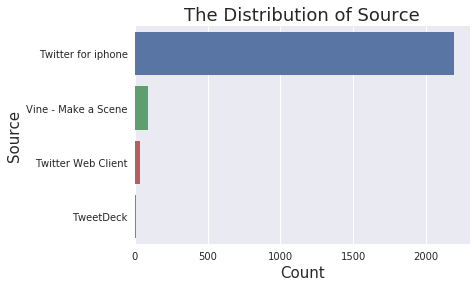

In [125]:
sorted_source = arch_clean['source'].value_counts().index
print( arch_clean['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data =  arch_clean, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Source', fontsize=15)
plt.title('The Distribution of Source',fontsize=18)

This plot above shows the distribution of source. We can see that the iPhone twitter app is used more frequently than any other app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDesk is pretty rare (less than 1%).

# Distribution of rating_numerator:-

12    445
11    370
10    367
13    247
9     132
8      68
7      31
14     26
6      16
5      14
4       6
3       5
2       2
0       1
Name: rating_numerator, dtype: int64


Text(0.5,1,'The Distribution of rating_numerator')

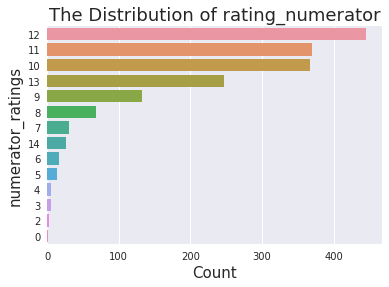

In [126]:
sorted_numerator = twitter_archive_master['rating_numerator'].value_counts().index
print( twitter_archive_master['rating_numerator'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data =  twitter_archive_master, y = 'rating_numerator', order = sorted_numerator)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=15)
plt.ylabel('numerator_ratings', fontsize=15)
plt.title('The Distribution of rating_numerator',fontsize=18)

In [127]:
twitter_archive_master.rating_numerator.describe()

count    1730.000000
mean       10.874566
std         1.774405
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

# Distribution of dogs:-

In [128]:
twitter_archive_master['p1'].value_counts().head(10)

golden_retriever      146
Labrador_retriever     97
Pembroke               88
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             37
cocker_spaniel         30
Name: p1, dtype: int64

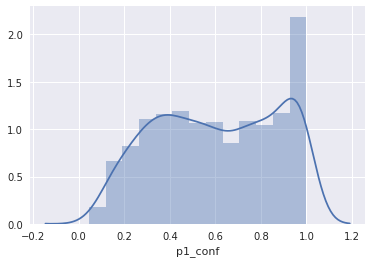

In [129]:
sns.set(style='darkgrid')
ax = sns.distplot(twitter_archive_master['p1_conf'])

These breeds above are the top 10 dog breeds this model predicted. Golden retriever and Labrador retriever are top 2 and both over 100 predictions. It could be because those two are most common breeds.

(-1.1076459252010746,
 1.2129155450294462,
 -1.1051114891596978,
 1.215449981070823)

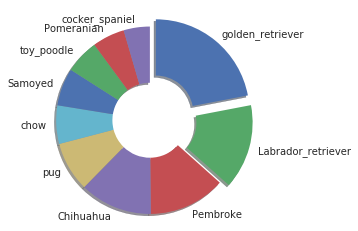

In [130]:
sns.set(style='darkgrid')
sorted_p1 = twitter_archive_master['p1'].value_counts().head(10)
plt.pie(sorted_p1, labels = sorted_p1.index, startangle = 90,shadow=True,explode=(0.1,0.1,0,0,0,0,0,0,0,0), counterclock = False,wedgeprops = {'width': 0.6})
plt.axis('square')